In [1]:
# Set root directory
# rp = f'/Users/bede/Research/Notebooks/res/2020-10-19/in/workshop0_2020-10-20'
rp = '.'
rpp = f'{rp}/in/workshop0_2020-10-20'

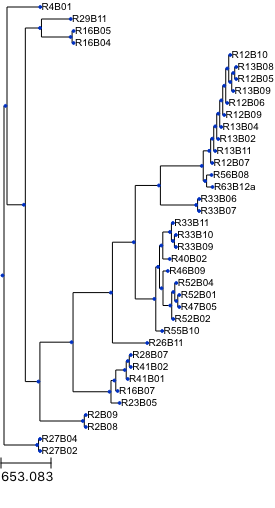

In [2]:
from ete3 import Tree, TreeStyle
treeString = open(f'{rp}/cluster_1_cf_scaled.tree','r').read()
t=Tree(treeString)

def mylayout(node):
    node.img_style["size"]=0
    node.img_style["vt_line_width"] = 2
    node.img_style["hz_line_width"] = 2

ts = TreeStyle()
ts.layout_fn = mylayout
# t.render(f'{rp}/figures/Staph_tree_2.png', tree_style=ts)
t.render("%%inline")

In [3]:
from ete3 import Tree, TreeStyle,TextFace
import pandas as pd

# load tree
treeString = open(f'{rp}/cluster_1_cf_scaled.tree','r').read()
t=Tree(treeString)

# load some meta data
df=pd.read_csv(f'{rp}/used_meta.csv')
keep_list=df['leaf'].to_list()
t.prune(keep_list)

# colours
staph_pos_cols={True:'Green',
        False:'Red'}

# functions
def mylayout(node):
    node.img_style["size"]=0
    node.img_style["vt_line_width"] = 2
    node.img_style["hz_line_width"] = 2

def addCell(text,color):
    cell=TextFace(text)
    cell.background.color=color
    cell.margin_top = 5
    cell.margin_right = 5
    cell.margin_left = 5
    cell.margin_bottom = 5
    cell.opacity = 0.5 # from 0 to 1
    cell.border.width = 1
    return cell



# iterate over leaves
for lf in t.iter_leaves():
    leaf=lf.get_leaf_names(is_leaf_fn=None)[0]
    d=df[df['leaf']==leaf].to_dict(orient='records')
    # staph +ve 
    cell=addCell(d[0]['Staph culture'],
            staph_pos_cols[d[0]['Staph culture']])
    lf.add_face(cell, column=0, position="aligned")

# styles and rendering
ts = TreeStyle()
ts.layout_fn = mylayout
# t.render(f'{rp}figures/Staph_tree_4.png', tree_style=ts)
t.render("%%inline")

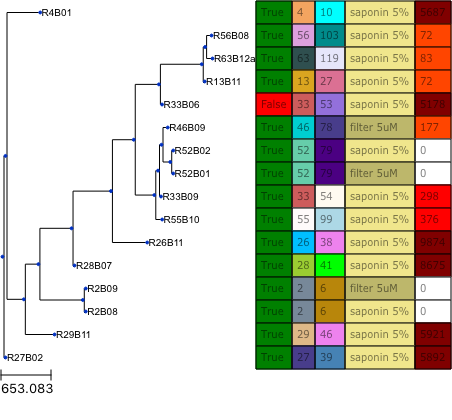

In [4]:
from ete3 import Tree, TreeStyle,TextFace
import pandas as pd
import json

# load tree
treeString = open(f'{rp}/cluster_1_cf_scaled.tree','rt').read()
t=Tree(treeString)

# load some meta data
df=pd.read_csv(f'{rp}/used_meta.csv')
keep_list=df['leaf'].to_list()
t.prune(keep_list)
df['run number']=df['run number'].map(str)
df['patient']=df['patient'].map(str)

# colours
treatCol={'saponin 5%':'Khaki',
        'filter 5uM': 'DarkKhaki'}

staph_pos_cols={True:'Green',
        False:'Red'}

with open(f'{rp}/colours.json', 'r') as fp:
    colours = json.load(fp)
    sampleCol=colours['sampleCols']
    runCol=colours['runCols']

def SNP_cols(n):
    if n==0:
        return 'White'
    elif n < 10:
        return 'Yellow'
    elif n < 50:
        return 'Orange'
    elif n < 200:
        return 'OrangeRed'
    elif n < 1000:
        return 'Red'
    elif n > 1000:
        return 'Maroon'
    else:
        return 'Dark grey'

# functions
def mylayout(node):
    node.img_style["size"]=0
    node.img_style["vt_line_width"] = 2
    node.img_style["hz_line_width"] = 2

def addCell(text,color):
    cell=TextFace(text)
    cell.background.color=color
    cell.margin_top = 5
    cell.margin_right = 5
    cell.margin_left = 5
    cell.margin_bottom = 5
    cell.opacity = 0.5 # from 0 to 1
    cell.border.width = 1
    return cell



# iterate over leaves
for lf in t.iter_leaves():
    leaf=lf.get_leaf_names(is_leaf_fn=None)[0]
    d=df[df['leaf']==leaf].to_dict(orient='records')
    # staph +ve
    cell=addCell(d[0]['Staph culture'],
            staph_pos_cols[d[0]['Staph culture']])
    lf.add_face(cell, column=0, position="aligned")
    # run number
    cell=addCell(d[0]['run number'],
            runCol[d[0]['run number']])
    lf.add_face(cell, column=1, position="aligned")
    # sample number
    cell=addCell(d[0]['patient'],
            sampleCol[d[0]['patient']])
    lf.add_face(cell, column=2, position="aligned")
    # sample number
    cell=addCell(d[0]['treatment'],
            treatCol[d[0]['treatment']])
    lf.add_face(cell, column=3, position="aligned")
    # Closest neighbour SNP number  
    cell=addCell(d[0]['SNPs'],
            SNP_cols(d[0]['SNPs']) )
    lf.add_face(cell, column=4, position="aligned")

# styles and rendering
ts = TreeStyle()
ts.show_leaf_name = False
ts.layout_fn = mylayout
# t.render(f'{rp}/figures/Staph_tree_5.png', tree_style=ts)
t.render("%%inline")